<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
file_name = "m2_survey_data.csv"

<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
df = pd.read_csv('m2_survey_data.csv')

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [7]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


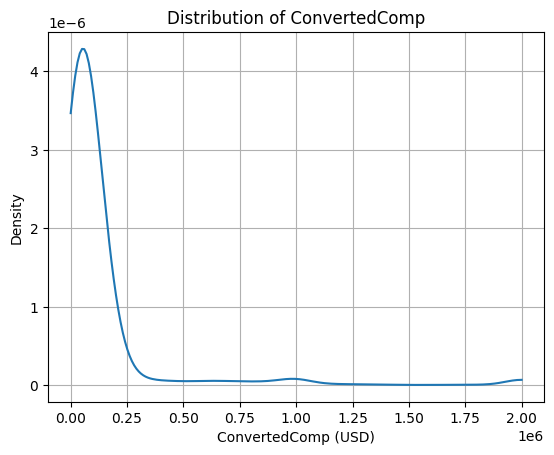

In [12]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Dropping NaN values and ensuring the data type is float for the density calculation
cleaned_data = df['ConvertedComp'].dropna().astype(float)

# Calculate the point density
density = gaussian_kde(cleaned_data)
xs = np.linspace(cleaned_data.min(), cleaned_data.max(), 200)
density.covariance_factor = lambda : .25
density._compute_covariance()

# Plot the distribution curve for ConvertedComp
plt.plot(xs, density(xs))
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


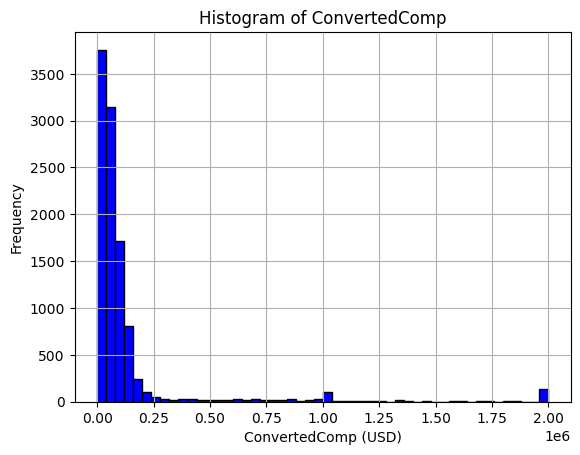

In [13]:
# your code goes here
import matplotlib.pyplot as plt

# Ensure that the data does not contain NaN values for this column as it can affect the plot
cleaned_data = df['ConvertedComp'].dropna()

# Plotting the histogram for ConvertedComp
plt.hist(cleaned_data, bins=50, color='blue', edgecolor='black')

plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here
# Calculate the median of the ConvertedComp column
median_converted_comp = df['ConvertedComp'].median()

print(f"The median of the ConvertedComp column is: {median_converted_comp}")

The median of the ConvertedComp column is: 57745.0


How many responders identified themselves only as a **Man**?


In [15]:
# your code goes here
# Count the number of respondents who identified only as "Man"
count_man = df[df['Gender'] == 'Man'].shape[0]

print(f"Number of respondents who identified themselves only as a Man: {count_man}")

Number of respondents who identified themselves only as a Man: 10480


In [18]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
# your code goes here
# Filter the DataFrame for respondents who identified only as "Woman"
women_respondents = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for these respondents
median_converted_comp_woman = women_respondents['ConvertedComp'].median()

print(f"The median ConvertedComp of respondents identified as Woman is: {median_converted_comp_woman}")

The median ConvertedComp of respondents identified as Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
# Using describe() to get the five-number summary for the Age column
age_summary = df['Age'].describe()

# The 'describe' method returns the count, mean, std, min, 25%, 50%, 75%, max by default.
# To get the five number summary, we focus on 'min', '25%', '50%', '75%', and 'max'.
five_number_summary = age_summary[['min', '25%', '50%', '75%', 'max']]

print("Five-number summary for the Age column:")
print(five_number_summary)


Five-number summary for the Age column:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


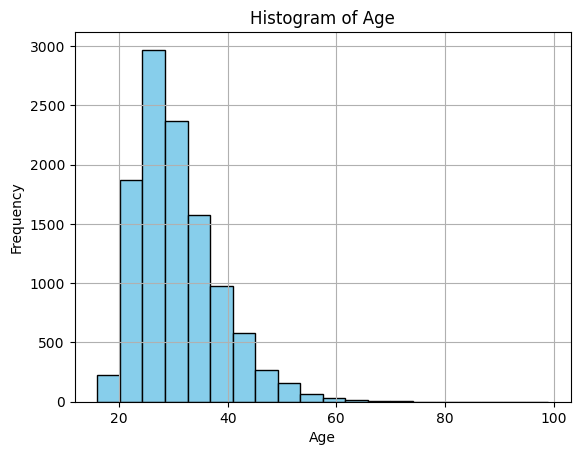

In [20]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Age' is the column you want to plot
# Ensure that the data does not contain NaN values for this column as it can affect the plot
cleaned_age_data = df['Age'].dropna()

# Plotting the histogram for the Age column
plt.hist(cleaned_age_data, bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


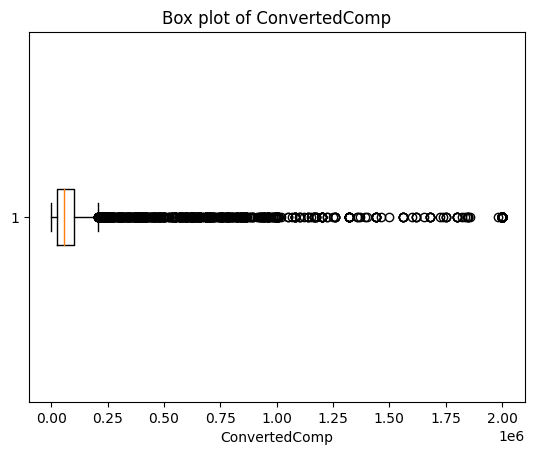

In [22]:
# your code goes here
import matplotlib.pyplot as plt

# Clean the data as before
cleaned_converted_comp = df['ConvertedComp'].dropna()

# Create the box plot
plt.boxplot(cleaned_converted_comp, vert=False)

plt.title('Box plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [23]:
# your code goes here
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Inter Quartile Range (IQR)
IQR = Q3 - Q1

print(f"The Inter Quartile Range (IQR) for the ConvertedComp column is: {IQR}")

The Inter Quartile Range (IQR) for the ConvertedComp column is: 73132.0


Find out the upper and lower bounds.


In [24]:
# your code goes here
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the ConvertedComp column
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for outliers: {lower_bound}")
print(f"Upper Bound for outliers: {upper_bound}")

Lower Bound for outliers: -82830.0
Upper Bound for outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [25]:
# your code goes here
# Calculate Q1, Q3, and IQR for the ConvertedComp column
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers in the ConvertedComp column: {num_outliers}")

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
# your code goes here
# Calculate Q1, Q3, and IQR for the ConvertedComp column
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame excluding the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print(f"Original DataFrame size: {df.shape}")
print(f"New DataFrame size (without outliers): {df_no_outliers.shape}")

Original DataFrame size: (11398, 85)
New DataFrame size (without outliers): (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
# your code goes here
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select the 'Age' column from the correlation matrix to get correlations between Age and all other numerical columns
age_correlations = correlation_matrix['Age']

print("Correlation of Age with all other numerical columns:")
print(age_correlations)

<ipython-input-27-232390490b8c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation of Age with all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
